[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PyMPDATA/blob/main/examples/PyMPDATA_examples/Arabas_and_Farhat_2020/fig_1.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PyMPDATA.git/main?urlpath=lab/tree/examples/PyMPDATA_examples/Arabas_and_Farhat_2020/fig_1.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PyMPDATA/blob/main/examples/PyMPDATA_examples/Arabas_and_Farhat_2020/fig_1.ipynb)

license: GPL v3   
authors: Sylwester Arabas, Michael Olesik, Piotr Bartman   
copyright: Jagiellonian University   
based on Fig. 1 from [Arabas & Farhat 2020](https://doi.org/10.1016/j.cam.2019.05.023)

In [ ]:
import sys

import matplotlib.pyplot as plt

if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PyMPDATA-examples')

In [1]:
import os
os.environ["NUMBA_DISABLE_JIT"] = "1"

In [2]:
import numpy as np
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot, show_anim
from PyMPDATA_examples.asian_option.simulation import Simulation
from PyMPDATA_examples.asian_option.setup3_asian_option import Settings
# from PyMPDATA_examples.asian_option.setup1_european_corridor import Settings
from PyMPDATA_examples.asian_option.colors import colors

In [3]:
# vel_a = 0.1
# vel_x = 2
# x_steps = 21
# a_steps = 20
# A = np.linspace(0, 10, a_steps)
# X = np.linspace(0, 10, x_steps)
# X, A = np.meshgrid(X, A)
# fig, ax = pyplot.subplots()
# # ax.quiver(X, A, vel_x, vel_a, color='red', label='vector-field values at cell centers')
# ax.quiver(X, A, vel_x, 0, color='green', label='vector-field x-component values at cell walls')
# ax.quiver(X, A, 0, vel_a, color='blue', label='vector-field a-component values at cell walls')
# ax.set_xlabel("underlying asset price")
# ax.set_ylabel("time-to-maturity")
# ax.set_title("vector-field values at cell walls")
# # ax.legend()
# show_plot()


In [4]:
settings = Settings()
simulation = Simulation(settings)

self.nt=92, self.dt=0.005434782608695652
self.S.shape=(75,), self.A.shape=(75,)
self.S_mesh.shape=(75, 75), self.A_mesh.shape=(75, 75)
cond.shape=(75, 75)
36, 38
advectee.shape=(75, 75)
np.max(np.abs(a_dim_advector))=0.8152173913043479, (75, 76)
np.max(np.abs(x_dim_advector))=0.01494353300742369, (76, 75)
x_dim_advector.shape=(76, 75) a_dim_advector.shape=(75, 76)
solver created


In [5]:
simulation.solver.advectee.get()[40]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

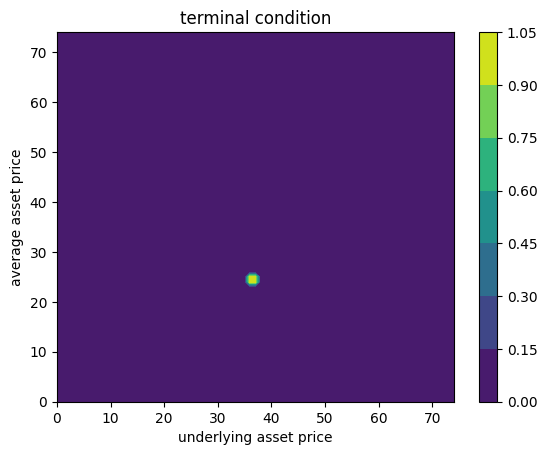

In [6]:
#do a 2d plot of the initial condition using the meshgrid and contourplot
fig, ax = pyplot.subplots()
CS = ax.contourf(simulation.solver.advectee.get())
fig.colorbar(CS, ax=ax)
ax.set_title("terminal condition")
ax.set_xlabel("underlying asset price")
ax.set_ylabel("average asset price")
pyplot.show()

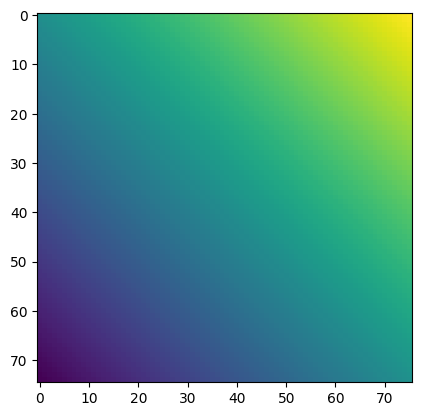

In [7]:
# plot img
pyplot.imshow(simulation.solver.advector.get_component(1))



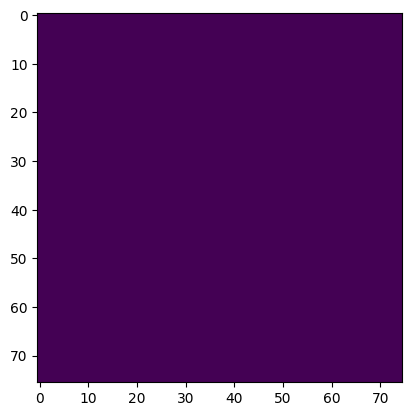

In [8]:
pyplot.imshow(simulation.solver.advector.get_component(0))


A.shape=(75, 76)
X.shape=(76, 75)
a_vals.shape=(75, 75)
x_vals.shape=(75, 75)


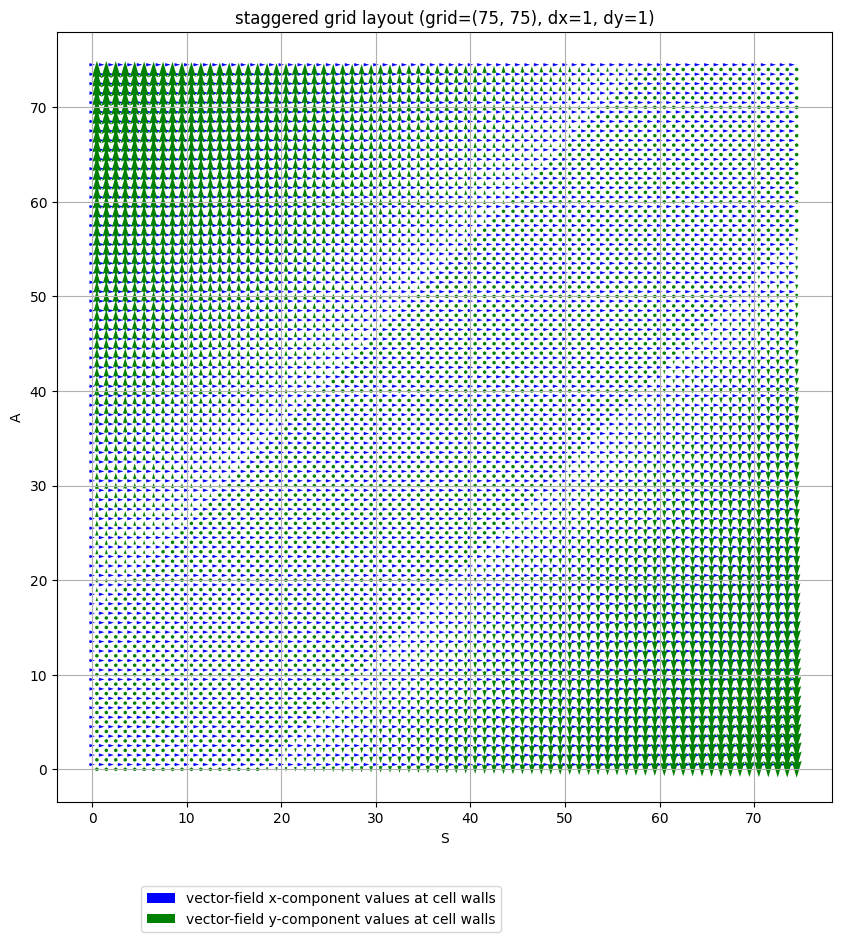

In [9]:
advector = simulation.solver.advector

# do a contour plot of advector
A = advector.get_component(1)
X = advector.get_component(0)
print(f"{A.shape=}")
print(f"{X.shape=}")
# fig, ax = pyplot.subplots()
x_vals = (X[1:, :] + X[0:-1, :])/2
a_vals = (A[:, 1:] + A[:, 0:-1])/2

print(f"{a_vals.shape=}")
print(f"{x_vals.shape=}")

# do a quiver plot based on the cell above
dx, dy = 1, 1
grid = (A.shape[0], A.shape[1]-1)
# grid = (15, 40)
# fig, ax = pyplot.subplots()
# make bigger plot
fig, ax = pyplot.subplots(figsize=(10, 10))
ax.quiver(*np.mgrid[
        0 : (grid[0]) * dx : dx,
        dy / 2 : grid[1] * dy : dy
    ], x_vals.flatten(), 0, pivot='mid', color='blue', width=.005,
    label='vector-field x-component values at cell walls'
)
ax.quiver(*np.mgrid[
        dx / 2 : grid[0] * dx : dx,
        0: (grid[1]) * dy : dy
    ], 0, a_vals.flatten(), pivot='mid', color='green', width=.005,
    label='vector-field y-component values at cell walls'
)
# set ax axes to equal aspect ratio
ax.axis('equal')
# pyplot.xticks(np.linspace(0, grid[0]*dx, grid[0]+1))
# pyplot.yticks(np.linspace(0, grid[1]*dy, grid[1]+1))
pyplot.title(f'staggered grid layout (grid={grid}, dx={dx}, dy={dy})')
pyplot.xlabel('S')
pyplot.ylabel('A')
pyplot.legend(bbox_to_anchor=(.1, -.1), loc='upper left', ncol=1)
# set equal aspect ratio
# ax.axis('equal')
pyplot.grid()
pyplot.show()
# pyplot.savefig('readme_grid.png')






In [10]:
simulation.solver.advectee.get()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
# res = simulation.run(n_iters=2)

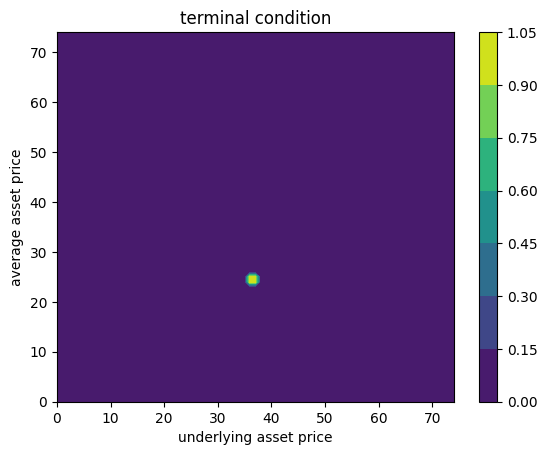

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19


C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:84: RuntimeWarning: overflow encountered in scalar multiply
  result = (np.abs(atv(*g_c, 0.5)) - atv(*g_c, +0.5) ** 2) * tmp
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:120: RuntimeWarning: overflow encountered in scalar multiply
  tmp *= 2 * (ats(*psi, 2) - ats(*psi, 1) - ats(*psi, 0) + ats(*psi, -1))
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:129: RuntimeWarning: invalid value encountered in scalar add
  result += tmp
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:171: RuntimeWarning: overflow encountered in scalar multiply
  tmp *= 0.5 * ats(*psi, 1) + ats(*psi, 0)
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:92: RuntimeWarning: overflow encountered in scalar multiply
  0.5
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:144: RuntimeWarning: overflow encountered i

iteration 20
iteration 21
iteration 22


C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:116: RuntimeWarning: overflow encountered in scalar power
  - 2 * atv(*g_c, 0.5) ** 3 / g_bar**2
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:171: RuntimeWarning: overflow encountered in scalar multiply
  tmp *= 0.5 * ats(*psi, 1) + ats(*psi, 0)
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:92: RuntimeWarning: overflow encountered in scalar multiply
  0.5
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:144: RuntimeWarning: overflow encountered in scalar multiply
  tmp *= 2 * (
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:84: RuntimeWarning: overflow encountered in scalar multiply
  result = (np.abs(atv(*g_c, 0.5)) - atv(*g_c, +0.5) ** 2) * tmp
C:\Users\Pawel\PycharmProjects\PyMPDATA\PyMPDATA\impl\formulae_antidiff.py:129: RuntimeWarning: invalid value encountered in scalar add
  result += tmp
C:\Us

iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39


In [12]:
history = [simulation.solver.advectee.get()]
fig, ax = pyplot.subplots()
CS = ax.contourf(simulation.solver.advectee.get())
fig.colorbar(CS, ax=ax)
ax.set_title("terminal condition")
ax.set_xlabel("underlying asset price")
ax.set_ylabel("average asset price")
pyplot.show()
for i in range(40):
    print(f"iteration {i}")
    res = simulation.run(n_iters=2)
    # fig, ax = pyplot.subplots()
    # CS = ax.contourf(simulation.solver.advectee.get())
    # fig.colorbar(CS, ax=ax)
    # ax.set_title("terminal condition")
    # ax.set_xlabel("underlying asset price")
    # ax.set_ylabel("average asset price")
    # pyplot.show()
    history.append(res)

In [ ]:
# #do a 2d plot of the initial condition using the meshgrid and contourplot
# fig, ax = pyplot.subplots()
# CS = ax.contourf(simulation.S_mesh, simulation.A_mesh, simulation.solver.advectee.get())
# fig.colorbar(CS, ax=ax)
# ax.set_title("terminal condition")
# ax.set_xlabel("underlying asset price")
# ax.set_ylabel("average asset price")
# pyplot.show()

In [12]:
from matplotlib.colors import LightSource
from matplotlib import cm
import matplotlib.pyplot as plt

In [13]:
# def show_func(frame):
#     fig, axs = plt.subplots(1, 1, subplot_kw={"projection": "3d"}, figsize=(15, 5))
#     state = history[frame]
#     x = np.arange(state.shape[1])
#     y = np.arange(state.shape[0])
#     x, y = np.meshgrid(x, y)
#     z = state
#
#     # Lighting setup
#     ls = LightSource(270, 45)
#     rgb = ls.shade(z, cmap=cm.coolwarm, vert_exag=0.1, blend_mode="soft")
#
#     axs.plot_surface(
#         x, y, z, rstride=1, cstride=1, facecolors=rgb, linewidth=0, antialiased=False
#     )
#     axs.set_title(f"t={frame}")
#     axs.set_xlabel("X-axis")
#     axs.set_ylabel("Y-axis")
#     axs.set_zlabel("Z-axis")
#
#     return fig

In [14]:
# def show_func2d(frame):
#     #do a 2d plot of the initial condition using the meshgrid and contourplot
#     fig, ax = pyplot.subplots()
#     CS = ax.contourf(simulation.S_mesh, simulation.A_mesh, history[frame])
#     fig.colorbar(CS, ax=ax)
#     ax.set_title("terminal condition")
#     ax.set_xlabel("underlying asset price")
#     ax.set_ylabel("average asset price")
#     # pyplot.show()
#     return fig

In [14]:
def show_func2d_2(frame):
    # simple 2d plot
    fig, ax = pyplot.subplots()
    CS = ax.contourf(history[frame])
    fig.colorbar(CS, ax=ax)
    ax.set_title("terminal condition")
    ax.set_xlabel("underlying asset price")
    ax.set_ylabel("average asset price")
    return fig


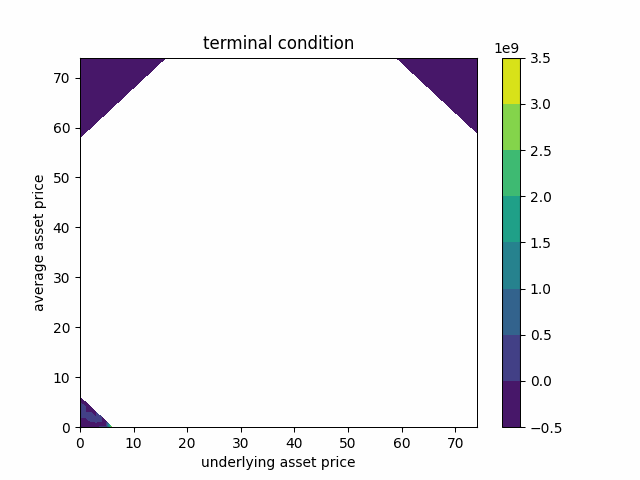

HTML(value="<a href='.\\tmpwoqq0m96.gif' target='_blank'>.\\tmpwoqq0m96.gif</a><br>")

In [15]:
show_anim(show_func2d_2, range(40), duration=0.01, loop=0)


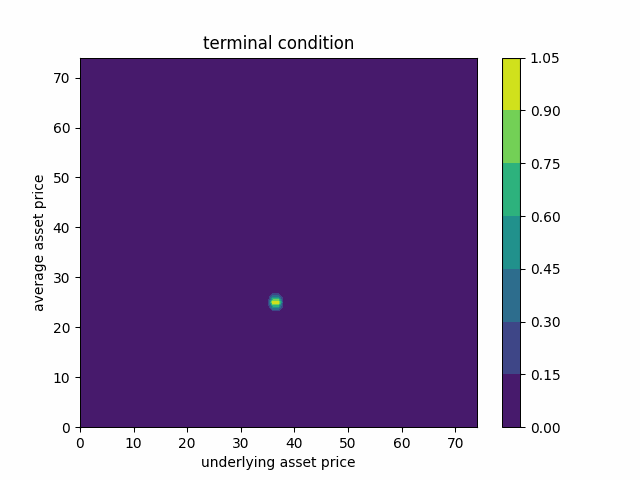

HTML(value="<a href='.\\tmp5oizziih.gif' target='_blank'>.\\tmp5oizziih.gif</a><br>")

In [15]:
show_anim(show_func2d_2, range(40), duration=0.01, loop=0)


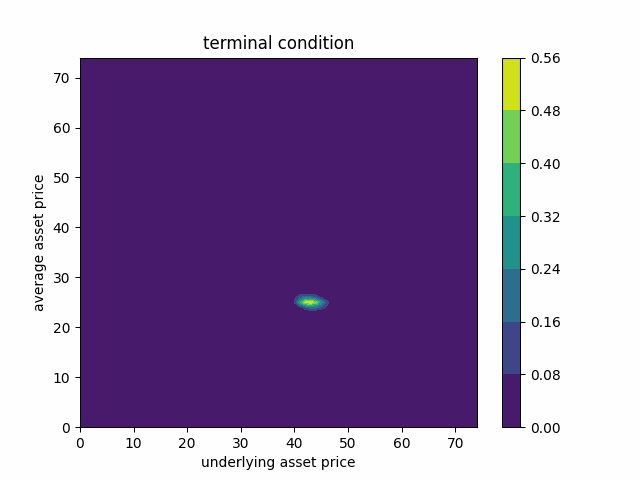

HTML(value="<a href='.\\tmpnip85yjy.gif' target='_blank'>.\\tmpnip85yjy.gif</a><br>")

In [16]:
show_anim(show_func2d_2, range(40), duration=0.01, loop=0)

In [ ]:
sol_at_t_0 = simulation.run(n_iters=2)

In [ ]:
sol_at_t_0

In [ ]:
# plot line of the diagonal of the solution
fig, ax = pyplot.subplots()
ax.plot(simulation.S, sol_at_t_0.diagonal())
ax.set_title("solution at t=0")
ax.set_xlabel("underlying asset price")
ax.set_ylabel("instrument value")
pyplot.show()

In [ ]:
# settings = Settings()
# simulation = Simulation(settings)
#
# S = simulation.S
# psi_T = simulation.solvers[2].advectee.get()
# #do a 2d plot of the initial condition using the meshgrid and contourplot
# fig, ax = pyplot.subplots()
# CS = ax.contourf(simulation.S_mesh, simulation.A_mesh, psi_T)
# fig.colorbar(CS, ax=ax)
# ax.set_title("Initial condition")
# ax.set_xlabel("average asset price")
# ax.set_ylabel("underlying asset price")
# pyplot.show()
#
#
#
# psi_0 = simulation.run(n_iters=2)
# # psi_a = settings.analytical_solution(S)
# print(f"{psi_0=}")